In [251]:
import os 
import sys
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [256]:
data = pd.read_csv('crs_data.csv')
data.head(10)

,course_id,course_name,course_code,is_prereq,prof_name,department,term,review_id,course_id.1,student_id,course_dif,course_sat,course_recom,prof_rating,student_grade
0,1,Introduction to CS I,1411,1,Bhanukiran Gurijala,COMP,FALL19,1000,1,1,10,9,7,9,9
1,2,Introduction to CS II,1412,1,Bhanukiran Gurijala,COMP,FALL19,1001,2,1,10,10,10,7,9
2,3,Data Structures,2313,1,Kemal Aydin,COMP,FALL19,1002,3,1,8,7,7,7,9
3,4,Computer Organization,2316,1,Bhanukiran Gurijala,COMP,FALL19,1003,4,1,7,7,10,10,9
4,5,Systems Programming,2415,0,Bhanukiran Gurijala,COMP,FALL19,1004,5,1,8,7,9,9,9
5,6,Algorithms,3317,0,Bhanukiran Gurijala,COMP,FALL19,1005,6,1,7,7,8,10,9
6,7,Operating Systems,3318,0,Bhanukiran Gurijala,COMP,FALL19,1006,7,1,8,9,10,9,9
7,8,Programming Languages,3320,0,Ihsan Said,COMP,FALL19,1007,8,1,10,8,10,8,9
8,9,Database Systems,3321,1,Ahmet Dogruer,COMP,FALL19,1008,9,1,7,8,9,9,9
9,10,Software Engineering,3322,1,Kemal Aydin,COMP,FALL19,1009,10,1,10,8,9,8,9


In [257]:
data_num = data.drop(columns=['course_id', 'course_code', 'is_prereq', 'prof_name',
       'department', 'term', 'review_id', 'course_id.1', 'student_id'], axis = 1)
data_num.head(10)

,course_name,course_dif,course_sat,course_recom,prof_rating,student_grade
0,Introduction to CS I,10,9,7,9,9
1,Introduction to CS II,10,10,10,7,9
2,Data Structures,8,7,7,7,9
3,Computer Organization,7,7,10,10,9
4,Systems Programming,8,7,9,9,9
5,Algorithms,7,7,8,10,9
6,Operating Systems,8,9,10,9,9
7,Programming Languages,10,8,10,8,9
8,Database Systems,7,8,9,9,9
9,Software Engineering,10,8,9,8,9


In [258]:
X = data[['course_dif', 'course_sat', 'course_recom', 'prof_rating', 'student_grade']]
X.head(10)

,course_dif,course_sat,course_recom,prof_rating,student_grade
0,10,9,7,9,9
1,10,10,10,7,9
2,8,7,7,7,9
3,7,7,10,10,9
4,8,7,9,9,9
5,7,7,8,10,9
6,8,9,10,9,9
7,10,8,10,8,9
8,7,8,9,9,9
9,10,8,9,8,9


In [259]:
y = data[['course_name']]
y.head(10)

,course_name
0,Introduction to CS I
1,Introduction to CS II
2,Data Structures
3,Computer Organization
4,Systems Programming
5,Algorithms
6,Operating Systems
7,Programming Languages
8,Database Systems
9,Software Engineering


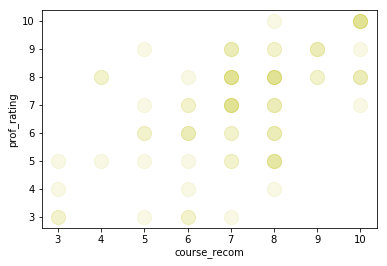

In [260]:
data.plot(kind='scatter', x='course_recom', y='prof_rating', color='y', alpha=.1, s=200) 

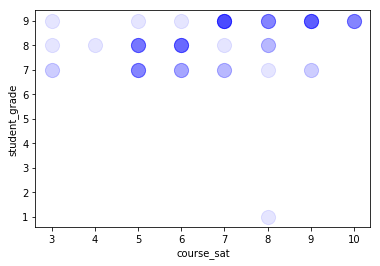

In [261]:
data.plot(kind='scatter', x='course_sat', y='student_grade', color='b', alpha=.1, s=200)

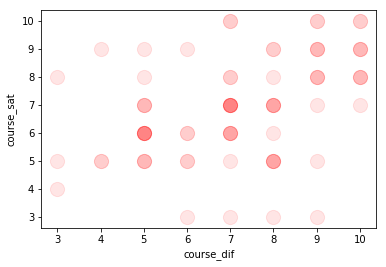

In [262]:
data.plot(kind='scatter', x='course_dif', y='course_sat', color='r', alpha=.1, s=200)    

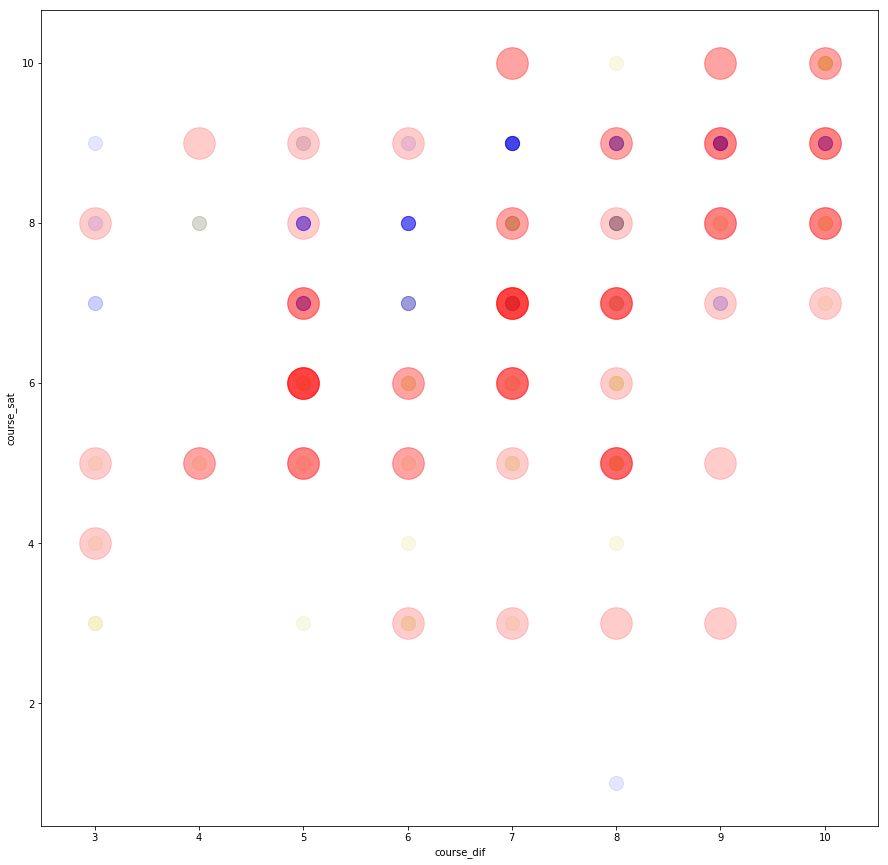

In [263]:
ax1 = data.plot(kind='scatter', x='course_recom', y='prof_rating', color='y', alpha=.1, s=200, figsize = (15,15)) 
ax2 = data.plot(kind='scatter', x='course_sat', y='student_grade', color='b', alpha=.1, s=200, figsize = (15,15), ax = ax1)
ax3 = data.plot(kind='scatter', x='course_dif', y='course_sat', color='r', alpha=.2, s=1000, figsize = (15,15), ax = ax1)

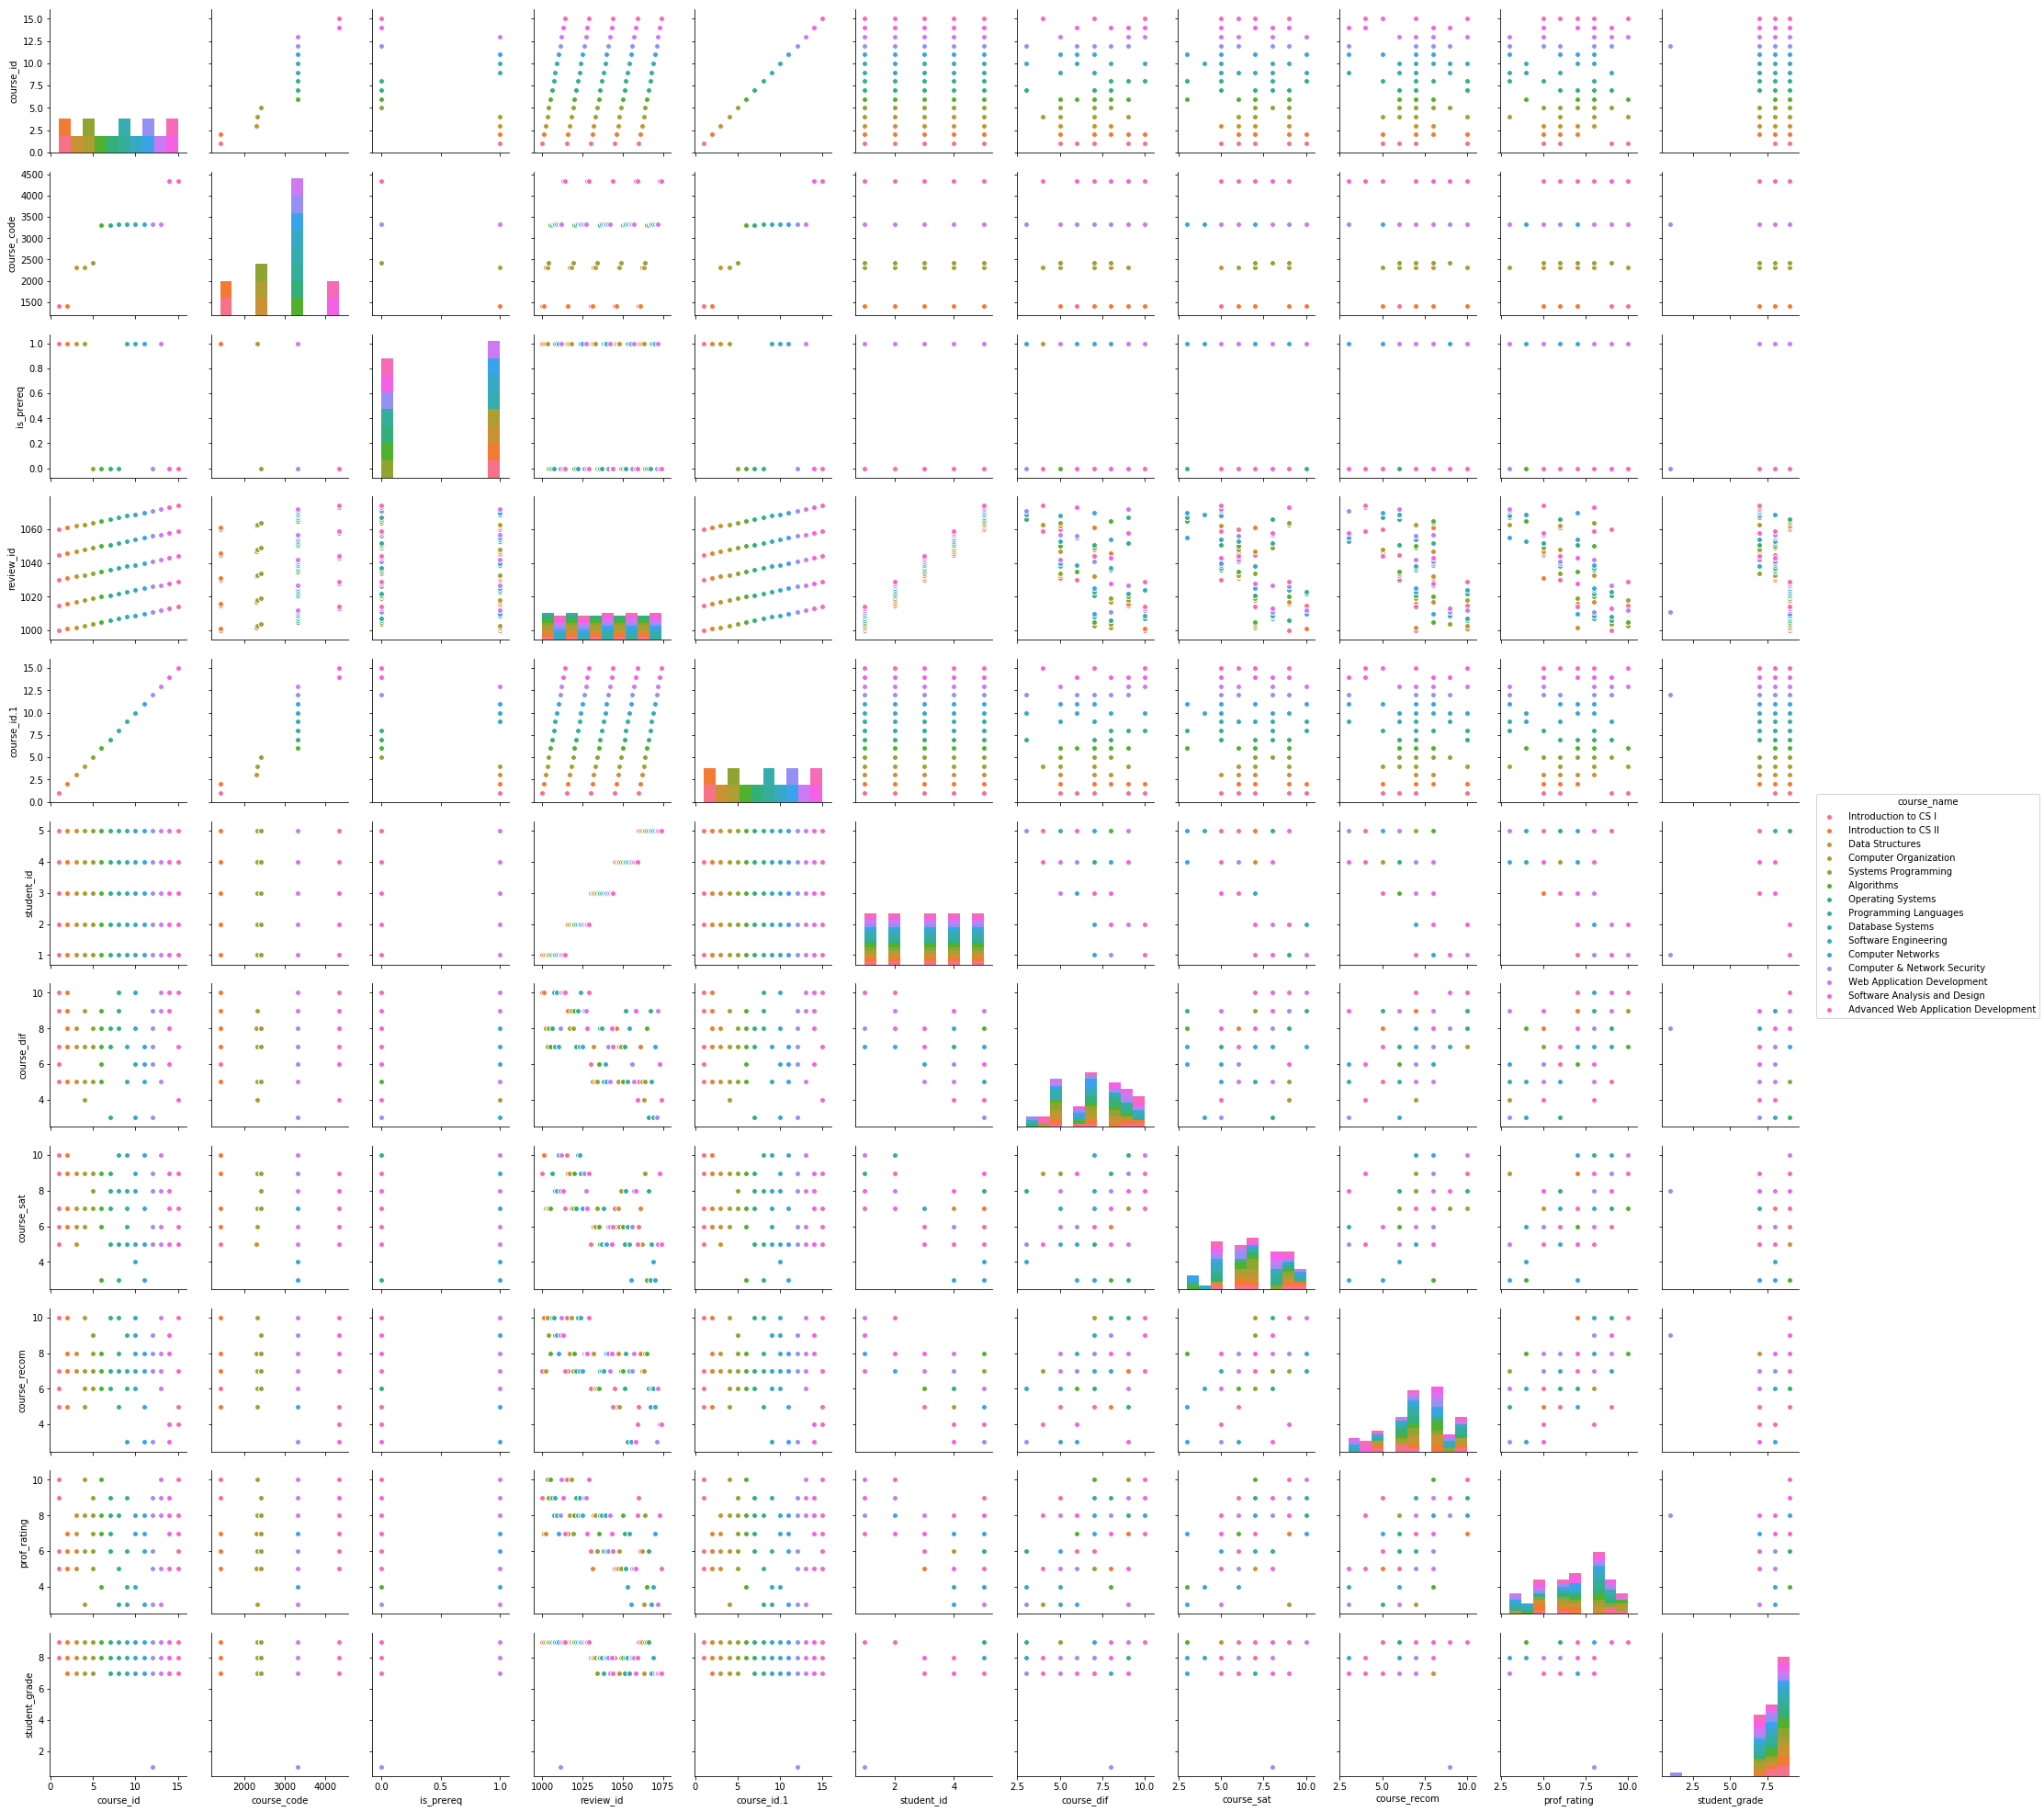

In [265]:
sns.pairplot(data, hue="course_name")

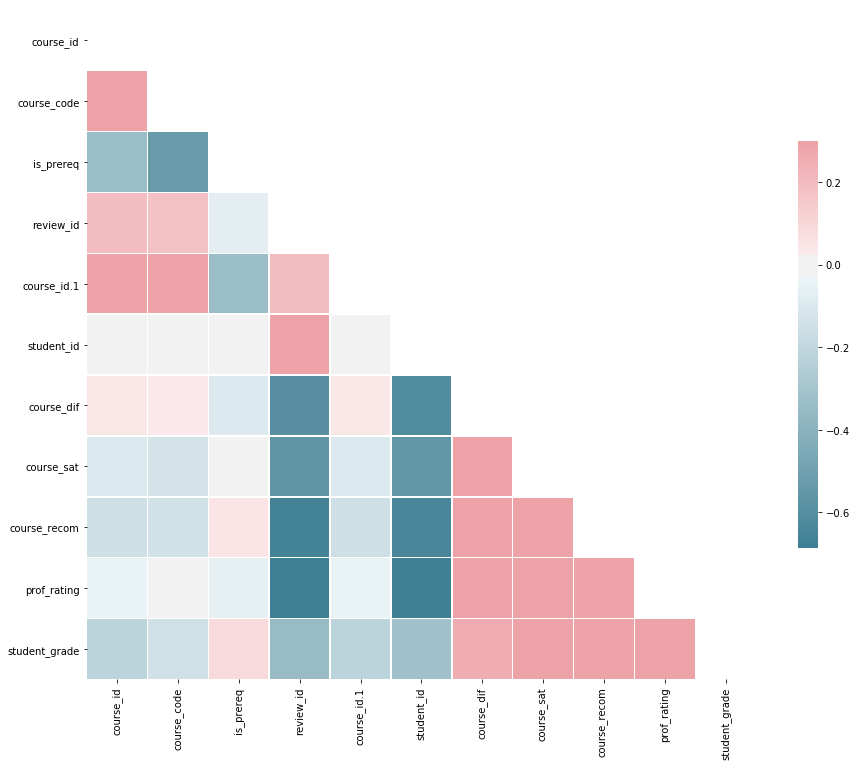

In [273]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

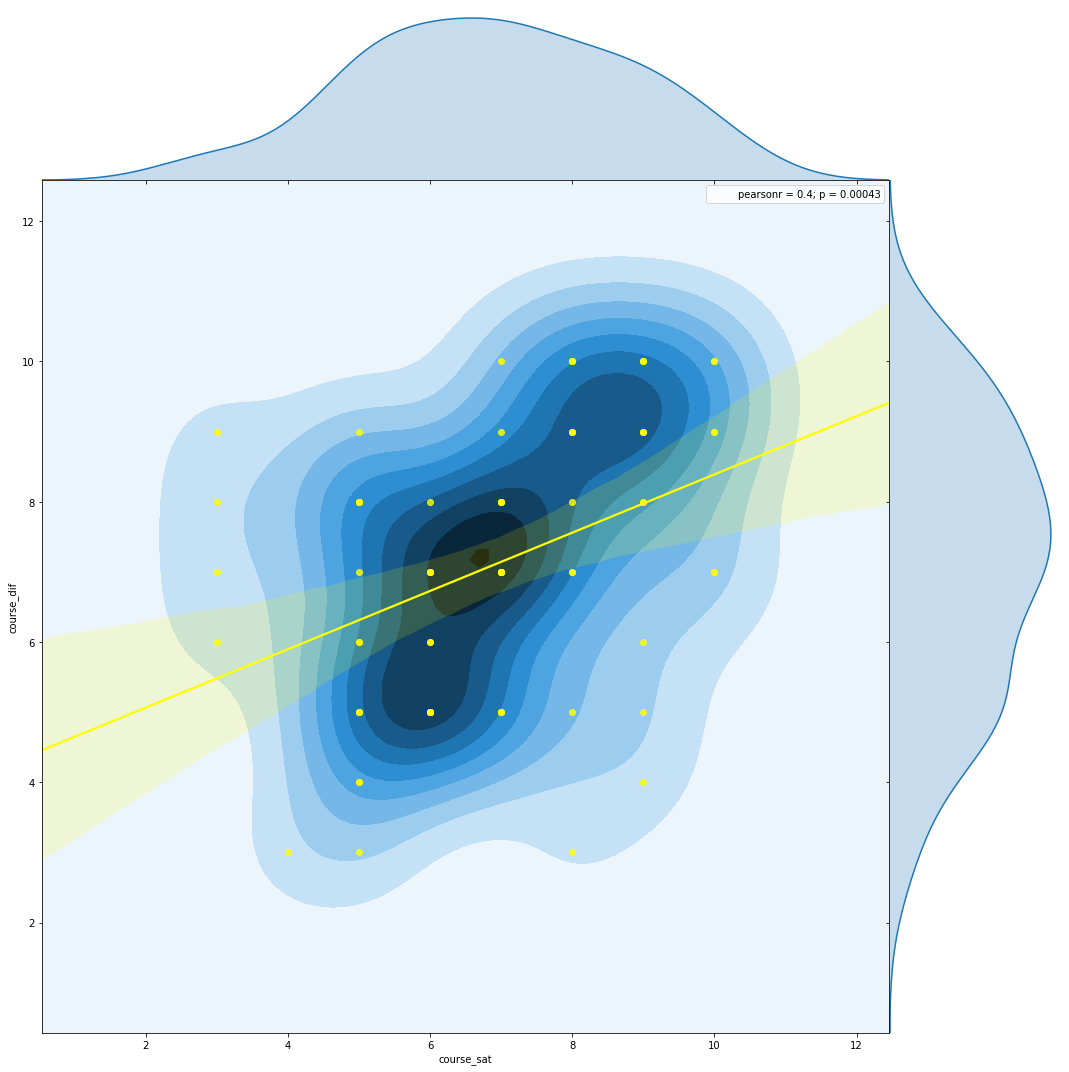

In [315]:
g = sns.jointplot('course_sat', 'course_dif', data = data, kind="kde", size = 15, space = 0)
sns.regplot('course_sat','course_dif', data = data, scatter = True, ax = g.ax_joint, color='yellow')
plt.show()

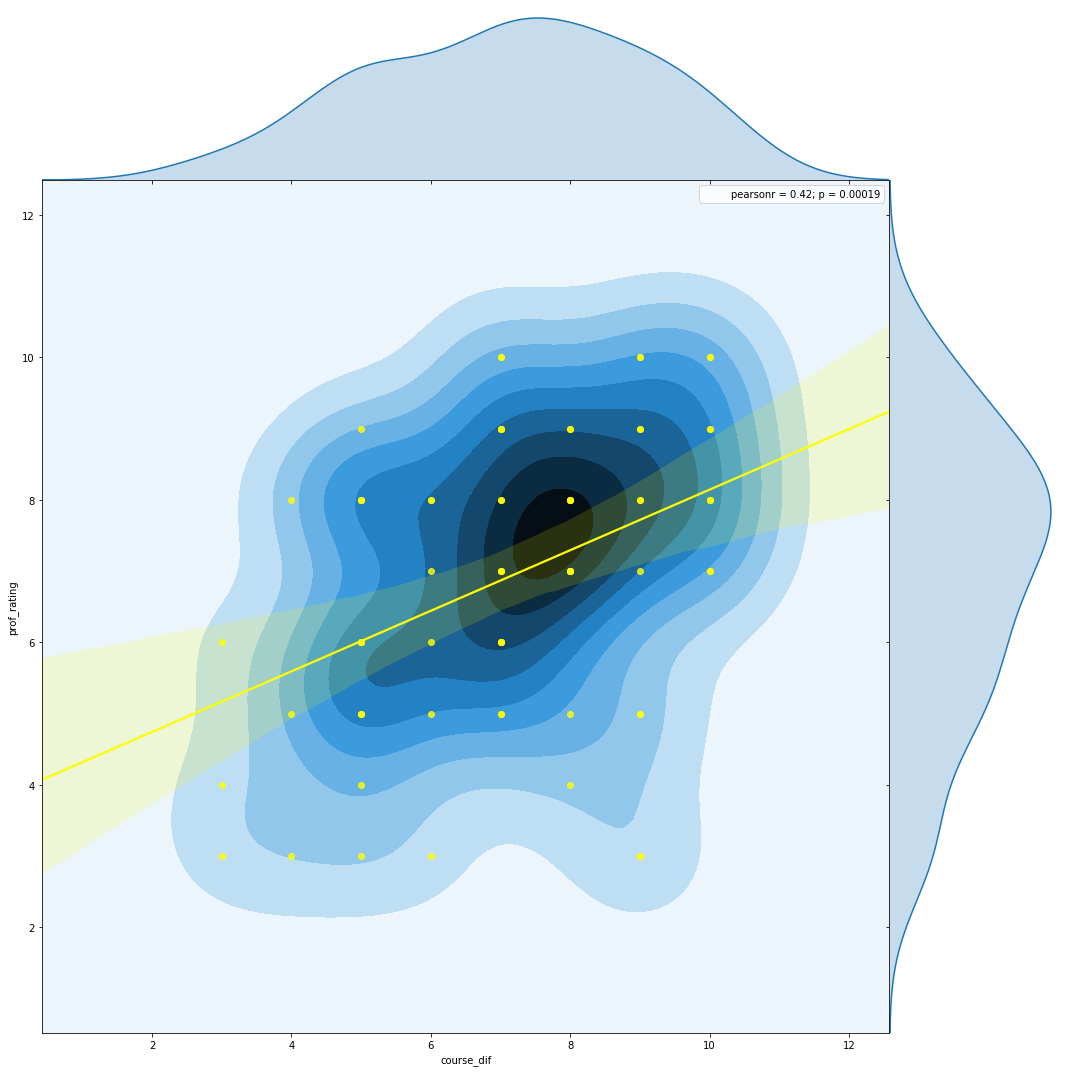

In [316]:
g = sns.jointplot('course_dif', 'prof_rating', data = data, kind="kde", size = 15, space = 0)
sns.regplot('course_dif','prof_rating', data = data, scatter = True, ax = g.ax_joint, color='yellow')
plt.show()

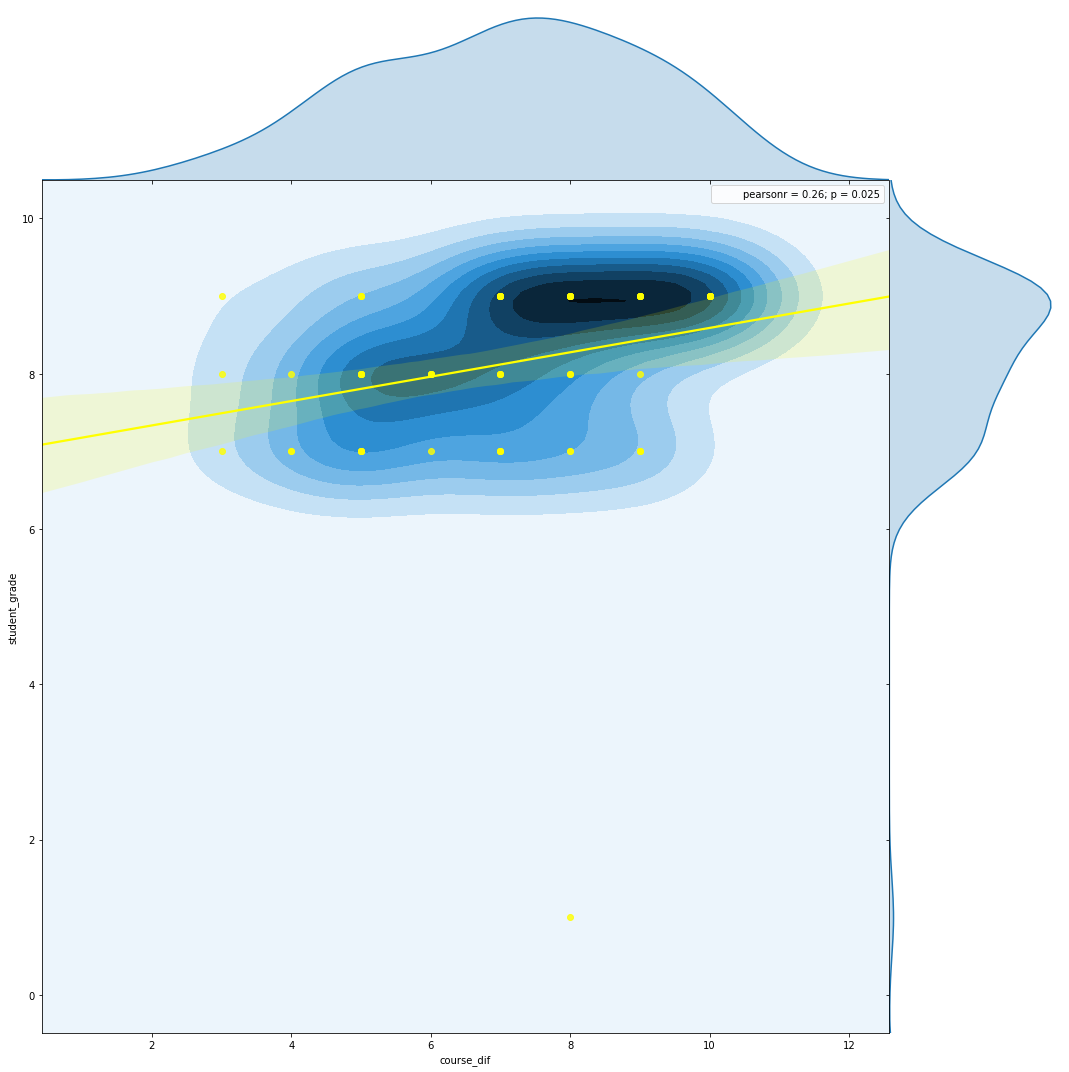

In [318]:
g = sns.jointplot('course_dif', 'student_grade', data = data, kind="kde", size = 15, space = 0)
sns.regplot('course_dif', 'student_grade', data = data, scatter = True, ax = g.ax_joint, color='yellow')
plt.show()

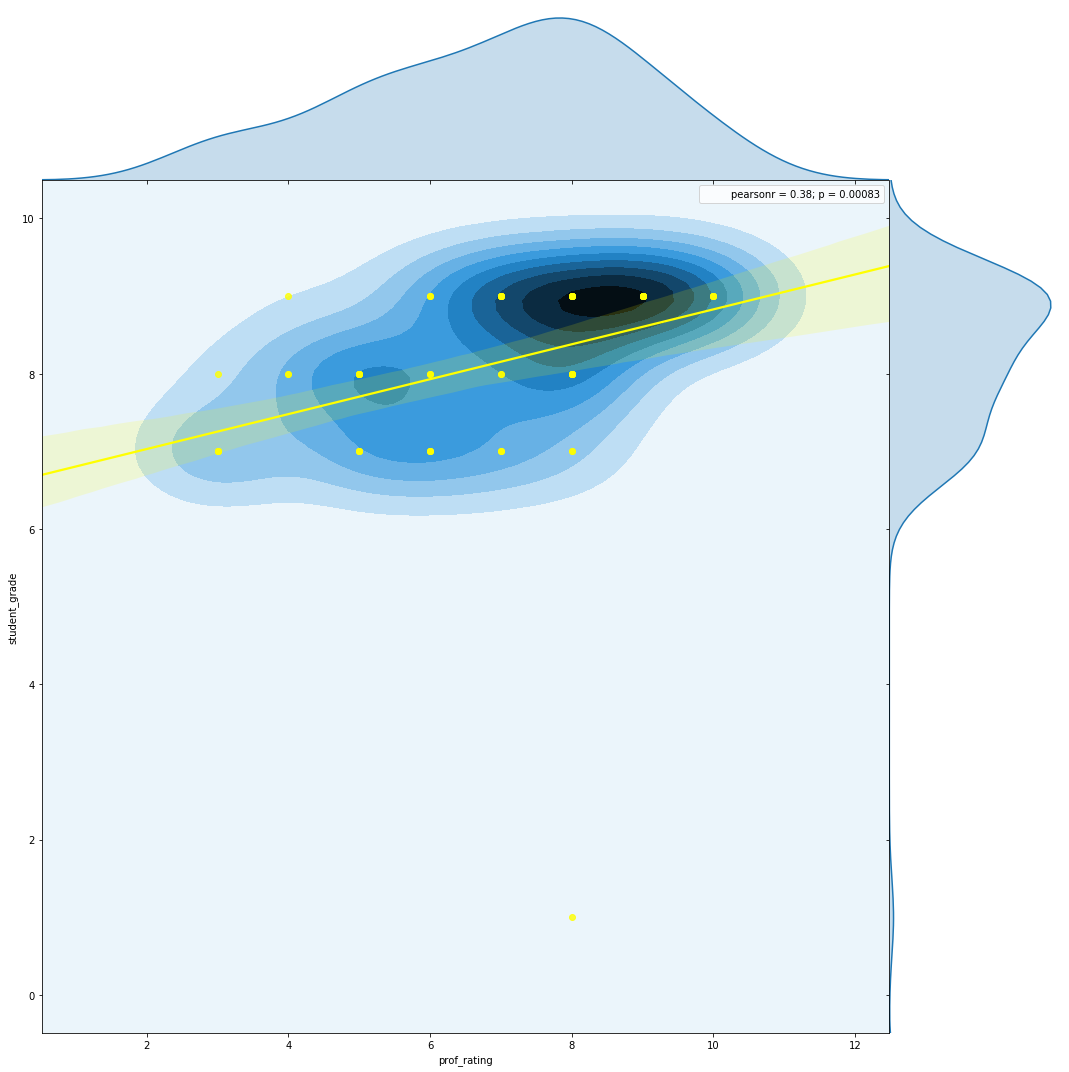

In [319]:
g = sns.jointplot('prof_rating', 'student_grade', data = data, kind="kde", size = 15, space = 0)
sns.regplot('prof_rating', 'student_grade', data = data, scatter = True, ax = g.ax_joint, color='yellow')
plt.show()